### GAM with a spatial smoother

This notebook demostrates how to add a spatial smoother to GAM to account for spatial autocorrelation.

In [1]:
#pip install rpy2
%load_ext rpy2.ipython

In [2]:
%%R 
#Import packages
#If any is missing, install using install.packages("xxx")
library(lattice)
library(sp)
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.


In [3]:
%%R

#Read in the data
data(meuse)
meuse$log_zinc = log(meuse$zinc)
coordinates(meuse) <- c("x", "y")

### Plotting raw data

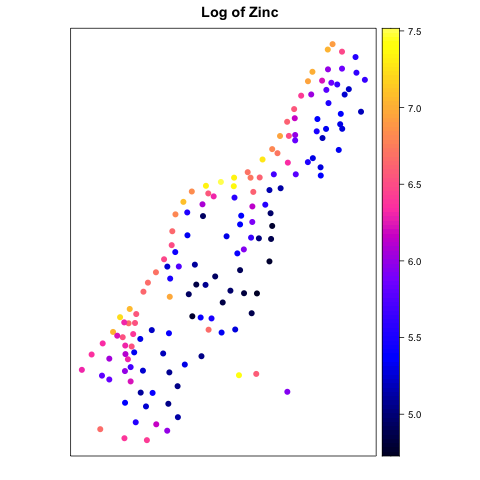

In [4]:
%%R 
spplot(meuse, "log_zinc", colorkey = TRUE, main="Log of Zinc")

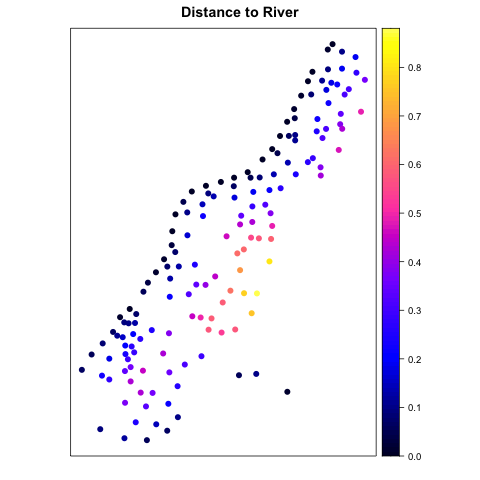

In [5]:
%%R

spplot(meuse, "dist", colorkey = TRUE, main="Distance to River")

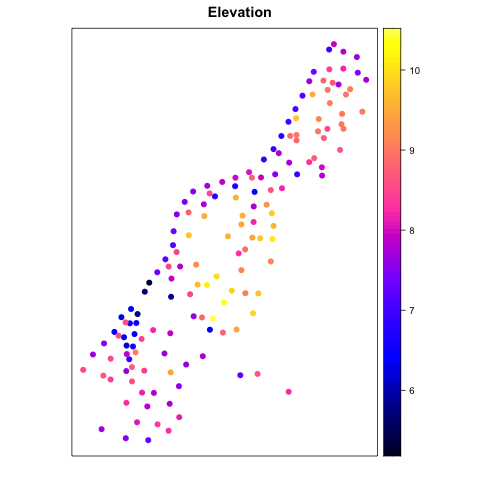

In [6]:
%%R

spplot(meuse, "elev", colorkey = TRUE, main="Elevation")

### Fitting a GAM

In [7]:
%%R

#Fit the GAM model
gam_meuse <- gam(log_zinc ~ s(x,y) + s(elev) + s(dist), data=meuse)

### GAM Results

In [8]:
%%R
#GAM results
summary(gam_meuse)


Family: gaussian 
Link function: identity 

Formula:
log_zinc ~ s(x, y) + s(elev) + s(dist)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.88578    0.02149   273.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
           edf Ref.df      F  p-value    
s(x,y)  23.143 26.526  4.571  < 2e-16 ***
s(elev)  2.007  2.527 28.984  < 2e-16 ***
s(dist)  4.098  5.097  6.665 1.48e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.863   Deviance explained = 88.9%
GCV = 0.088929  Scale est. = 0.071575  n = 155


### Visualizing GAM

There is a `scheme`parameter in `plot()` that changes the style of the spatial smoother.

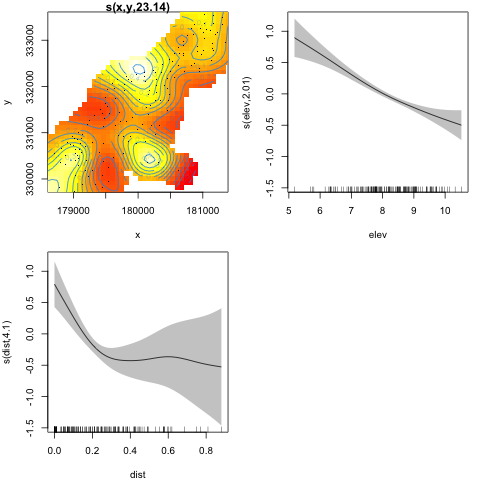

In [9]:
%%R
par(mar = c(4, 4, 1, 1))
plot(gam_meuse,scheme=2,shade=T,page=1)

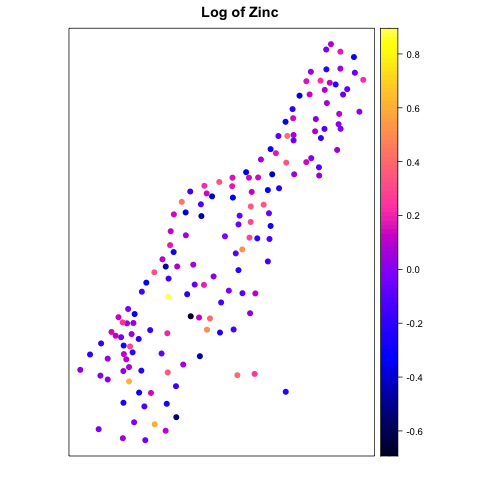

In [10]:
%%R 
meuse$gam_residuals = gam_meuse$residuals
spplot(meuse,"gam_residuals", colorkey = TRUE, main="Log of Zinc")

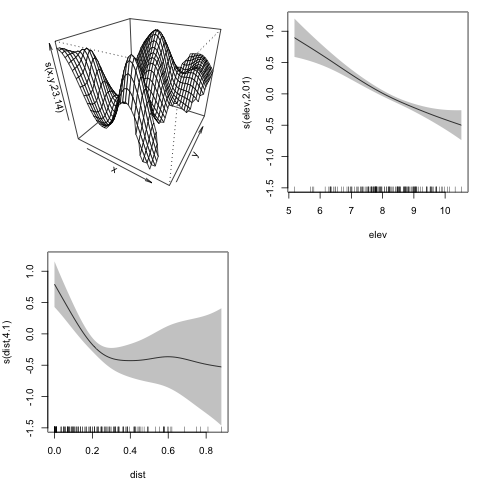

In [11]:
%%R
par(mar = c(4, 4, 1, 1))
plot(gam_meuse,scheme=1,shade=T,page=1)

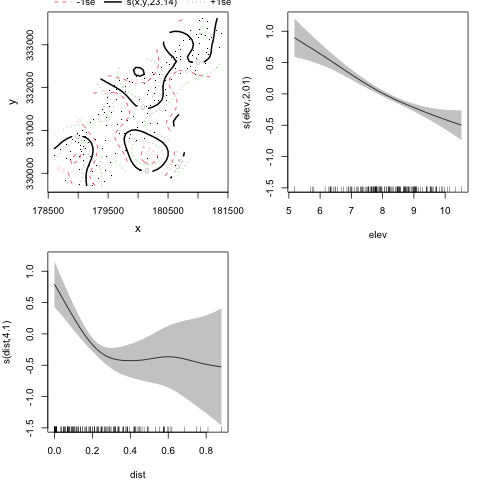

In [12]:
%%R
par(mar = c(4, 4, 1, 1))
plot(gam_meuse,scheme=0,shade=T,page=1)

### Check GAM


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 9 iterations.
The RMS GCV score gradient at convergence was 7.834529e-07 .
The Hessian was positive definite.
Model rank =  48 / 48 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

           k'   edf k-index p-value  
s(x,y)  29.00 23.14    1.14    0.99  
s(elev)  9.00  2.01    0.92    0.08 .
s(dist)  9.00  4.10    1.17    0.98  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


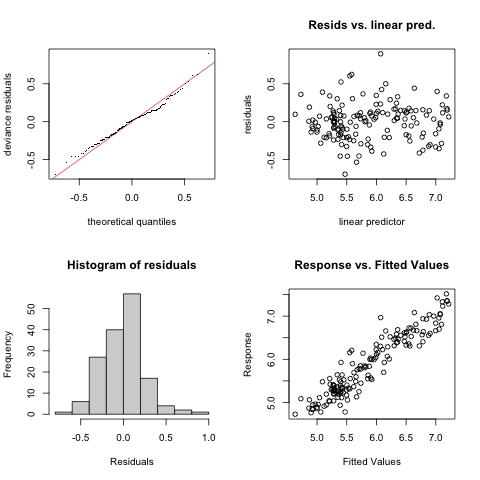

In [13]:
%%R
#Check gam
gam.check(gam_meuse)
